In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
data = pd.read_csv('spam.csv')  

In [53]:
data.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [54]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [55]:
data.shape

(5572, 2)

In [56]:
data.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


#to know the uniques values in evey column in the dataset:

In [58]:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Category column  :  
['ham' 'spam']
**************************************************
All items in the ---->>>Message column  :  
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
**************************************************


#check missing values:

In [60]:
data.isna().sum()

Category    0
Message     0
dtype: int64

#know the number of every item in every column:

In [62]:
for col in data.columns:
    print(f"counts of items in  \n -->> {data[col].value_counts()}")
    print("-"*25)

counts of items in  
 -->> Category
ham     4825
spam     747
Name: count, dtype: int64
-------------------------
counts of items in  
 -->> Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                        

In [63]:
#Check if there are aduplicated values in the data & drop it if found :

In [64]:
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)
data=df

Number of duplicates ----->>>  415
Number of duplicates of cleaning it ----->>>  0


In [65]:
data.shape

(5157, 2)

In [66]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


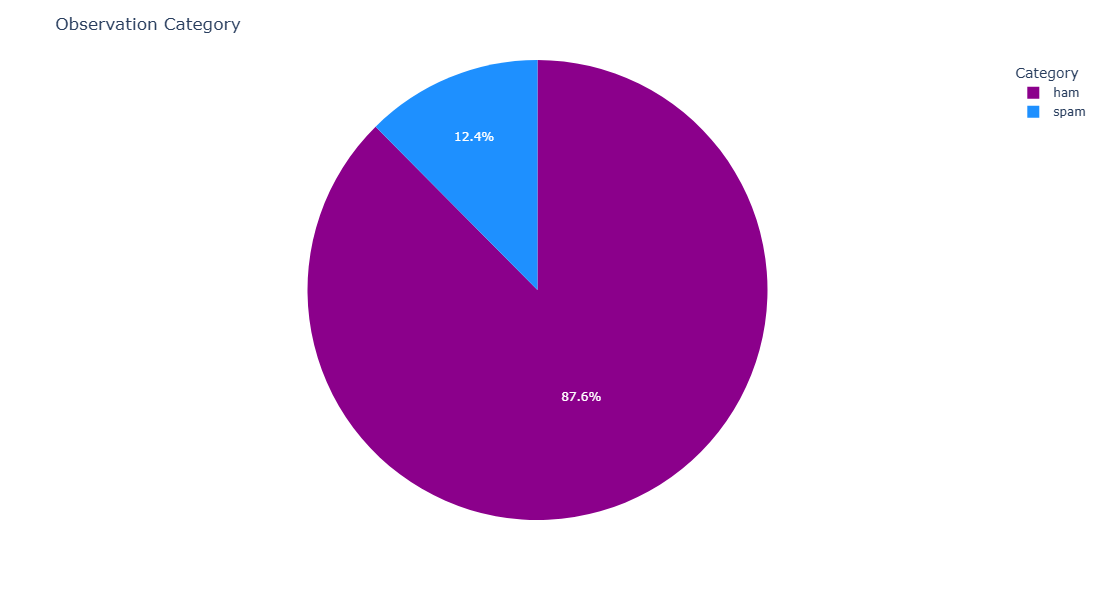

In [67]:
# Calculate the value counts
import plotly.express as px 
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Define the color palette
color_palette = ['#8B008B', '#1E90FF']

# Create the pie chart
fig = px.pie(category_counts, names='Category', values='Count', color_discrete_sequence=color_palette)

# Update the layout
fig.update_layout(
    title="Observation Category",
    legend_title="Category",
    width=800,
    height=600
)

# Show the plot
fig.show()

In [68]:
data['Category'].apply(lambda x:1 if x=='spam' else 0)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int64

Divided the Category

In [70]:
data['Spam'] =  data['Category'].apply(lambda x:1 if x=='spam' else 0)


In [71]:
data['ham'] =  data['Category'].apply(lambda x:1 if x=='ham' else 0)


In [72]:
data = data[['Message','ham','Spam']]

In [73]:
data

,Message,ham,Spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,1
5568,Will ü b going to esplanade fr home?,1,0
5569,"Pity, * was in mood for that. So...any other s...",1,0
5570,The guy did some bitching but I acted like i'd...,1,0


converting all words to lowercase

In [75]:
data['Message'] = data['Message'].str.lower()
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\2756967733.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,"go until jurong point, crazy.. available only ...",1,0
1,ok lar... joking wif u oni...,1,0
2,free entry in 2 a wkly comp to win fa cup fina...,0,1
3,u dun say so early hor... u c already then say...,1,0
4,"nah i don't think he goes to usf, he lives aro...",1,0


Removing Punctuation

In [77]:
data['Message'] = data['Message'].str.replace(r'[^\w\s]', '', regex=True)
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\357163695.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,go until jurong point crazy available only in ...,1,0
1,ok lar joking wif u oni,1,0
2,free entry in 2 a wkly comp to win fa cup fina...,0,1
3,u dun say so early hor u c already then say,1,0
4,nah i dont think he goes to usf he lives aroun...,1,0


In [78]:
data['Message'] = data['Message'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\1653459301.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,go until jurong point crazy available only in ...,1,0
1,ok lar joking wif u oni,1,0
2,free entry in a wkly comp to win fa cup final...,0,1
3,u dun say so early hor u c already then say,1,0
4,nah i dont think he goes to usf he lives aroun...,1,0


Tokenization

In [204]:
data['Message'] = data['Message'].str.split()
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\611964913.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",1,0
1,"[ok, lar, joking, wif, u, oni]",1,0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",0,1
3,"[u, dun, say, early, hor, u, c, already, say]",1,0
4,"[nah, dont, think, go, usf, life, around, though]",1,0


Removing Stop Words

In [82]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['Message'] = data['Message'].apply(lambda x: [word for word in x if word not in stop_words])
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\2349578741.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",1,0
1,"[ok, lar, joking, wif, u, oni]",1,0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",0,1
3,"[u, dun, say, early, hor, u, c, already, say]",1,0
4,"[nah, dont, think, goes, usf, lives, around, t...",1,0


Reduces words to their canonical form (lemmatization), so that variations of a word are treated as the same word.

In [84]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['Message'] = data['Message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\3196370520.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",1,0
1,"[ok, lar, joking, wif, u, oni]",1,0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",0,1
3,"[u, dun, say, early, hor, u, c, already, say]",1,0
4,"[nah, dont, think, go, usf, life, around, though]",1,0


Rejoining Words into Sentences


In [86]:
data['Message'] = data['Message'].apply(lambda x: ' '.join(x))
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15456\375340801.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Message,ham,Spam
0,go jurong point crazy available bugis n great ...,1,0
1,ok lar joking wif u oni,1,0
2,free entry wkly comp win fa cup final tkts st ...,0,1
3,u dun say early hor u c already say,1,0
4,nah dont think go usf life around though,1,0


Vectorizing the Mails

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1)
X = vectorizer.fit_transform(data['Message'])


defining the output feature

In [90]:
data

,Message,ham,Spam
0,go jurong point crazy available bugis n great ...,1,0
1,ok lar joking wif u oni,1,0
2,free entry wkly comp win fa cup final tkts st ...,0,1
3,u dun say early hor u c already say,1,0
4,nah dont think go usf life around though,1,0
...,...,...,...
5567,nd time tried contact u u pound prize claim ea...,0,1
5568,b going esplanade fr home,1,0
5569,pity mood soany suggestion,1,0
5570,guy bitching acted like id interested buying s...,1,0


In [91]:
y=data['Spam']

In [92]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Spam, Length: 5157, dtype: int64

In [93]:
y.value_counts()

Spam
0    4516
1     641
Name: count, dtype: int64

In [94]:
X.shape

(5157, 7948)

In [95]:
X

<5157x7948 sparse matrix of type '<class 'numpy.float64'>'
	with 41467 stored elements in Compressed Sparse Row format>

In this way, you can ensure that all datasets have the same number of samples before applying any operations on them

In [97]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X,y)
print(pd.Series(y_resampled).value_counts())

Spam
0    4516
1    4516
Name: count, dtype: int64


In [98]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ML Model 

1)Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',random_state=33)
LogisticRegressionModel.fit(X_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))


LogisticRegressionModel Train Score is :  0.9599172485130593
LogisticRegressionModel Test Score is :  0.9472868217054263


In [102]:
#Calculating Prediction

In [103]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 1 0 0 0 1 1 0 1 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.93876735 0.06123265]
 [0.4933568  0.5066432 ]
 [0.97190646 0.02809354]
 [0.96311893 0.03688107]
 [0.960096   0.039904  ]
 [0.45797306 0.54202694]
 [0.06734702 0.93265298]
 [0.7411548  0.2588452 ]
 [0.47678459 0.52321541]
 [0.92962092 0.07037908]]


Calculating Confusion Matrix

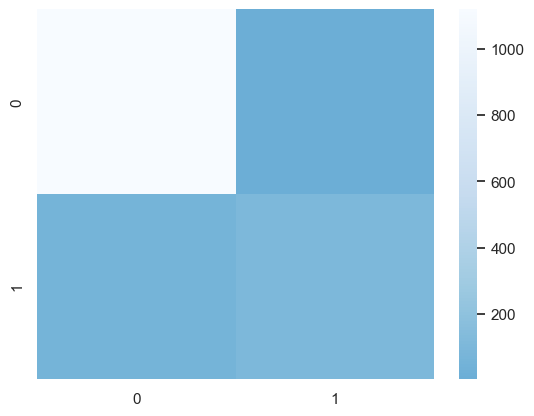

In [105]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

2)random forest classifier

In [107]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)


RandomForestClassifierModel Train Score is :  0.8771657615722782
RandomForestClassifierModel Test Score is :  0.8713178294573644
RandomForestClassifierModel features importances are :  [0. 0. 0. ... 0. 0. 0.]


Calculating Prediction

In [109]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.87967874 0.12032126]
 [0.86061959 0.13938041]
 [0.88724467 0.11275533]
 [0.88724467 0.11275533]
 [0.87188582 0.12811418]
 [0.85056821 0.14943179]
 [0.83148052 0.16851948]
 [0.86811491 0.13188509]
 [0.83295431 0.16704569]
 [0.88724467 0.11275533]]


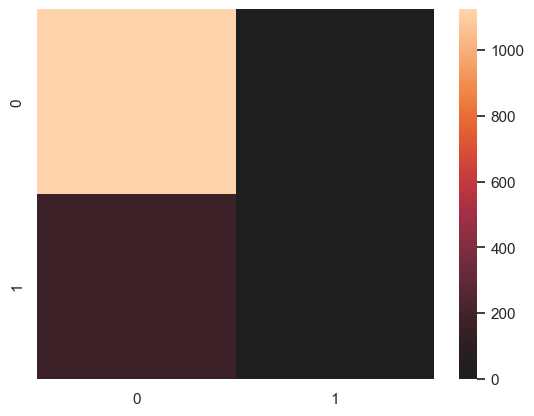

In [110]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True)
plt.show()

3)adaboosting classifier

In [112]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))


GBCModel Train Score is :  0.9746573571243858
GBCModel Test Score is :  0.9550387596899225


Calculating Prediction

In [114]:
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
print('Predicted Value for GBCModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])

Predicted Value for GBCModel is :  [0 0 0 0 0 1 1 0 1 0]
Prediction Probabilities Value for GBCModel is :  [[0.95544503 0.04455497]
 [0.80958411 0.19041589]
 [0.97253407 0.02746593]
 [0.97253407 0.02746593]
 [0.8879348  0.1120652 ]
 [0.0966403  0.9033597 ]
 [0.04907949 0.95092051]
 [0.7175574  0.2824426 ]
 [0.39414994 0.60585006]
 [0.97253407 0.02746593]]


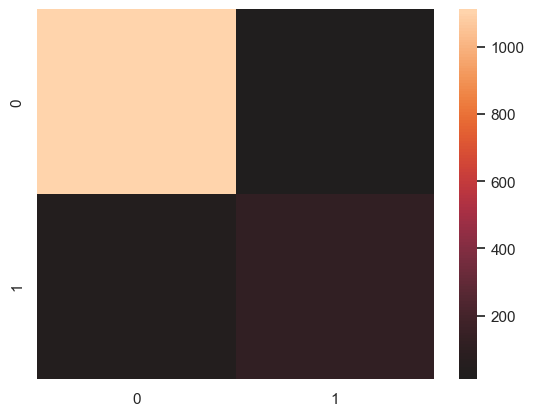

In [115]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True)
plt.show()

3)KNN

In [117]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 3,weights ='uniform', # it can be distance
                                       algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))


KNNClassifierModel Train Score is :  0.9361261960175847
KNNClassifierModel Test Score is :  0.9232558139534883


Calculating Prediction

In [119]:
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for KNNClassifierModel is :  [0 0 0 0 0 0 0 0 1 0]
Prediction Probabilities Value for KNNClassifierModel is :  [[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]]


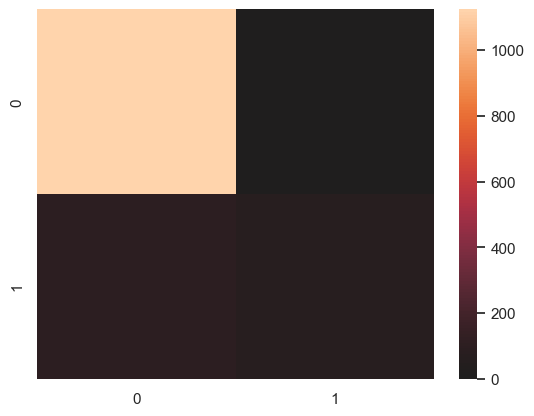

In [120]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True)
plt.show()

## So, we can see that adaboosting classifier performs the best accuracy